# Docs

https://en.wikipedia.org/wiki/L-system

Alphabet :
- F : Se déplacer d’un pas unitaire
- $+$ : Tourner à gauche d’angle α
- $-$ : Tourner à droite d’un angle α
- | : Tourner de 180°
- [ : Ajoute la position actuelle à la liste des positions sauvegardées
- ] : Réstaure la dernière position suvegardée et l'enlève de la liste
- ^ : Lève le crayon
- _ : Baisse le crayon

# Generator

In [2]:
def L_sys(axiom, rules, n_iter):
    for _ in range(n_iter):
        word = ''
        for c in axiom:
            try:
                word += rules[c]
            except:
                word += c
        axiom = word
    return axiom

In [20]:
# Dragon curve
axiom = 'FX'
rules = {'X':'X-YF-', 'Y':'+FX+Y'}
angle = 90
startheading = 0

actions = L_sys(axiom, rules, 8)

In [31]:
# Sierpinski triangle
axiom = 'A'
rules = {'A':'B-A-B', 'B':'A+B+A'}
angle = 60
startheading = 0

actions = L_sys(axiom, rules, 5)
actions = actions.replace('A', 'F').replace('B', 'F')

In [67]:
# Hilbert curve
axiom = 'R'
rules = {'L':'-RF+LFL+FR-', 'R':'+LF-RFR-FL+'}
angle = 90
startheading = 0

actions = L_sys(axiom, rules, 4)

In [35]:
# Gosper curve
axiom = 'A'
rules = {'A':'A-B--B+A++AA+B-', 'B':'+A-BB--B-A++A+B'}
angle = 60
startheading = 270

actions = L_sys(axiom, rules, 3)
actions = actions.replace('A', 'F').replace('B', 'F')

In [52]:
# Fractal plant 1 
axiom = 'F'
rules = {'F':'F[+F]F[-F]F'}
angle = 30
startheading = 90

actions = L_sys(axiom, rules, 3)

In [62]:
# Fractal plant 2
axiom = 'X'
rules = {'X':'F[+X]F[-X]+X', 'F':'FF'}
angle = 20
startheading = 90

actions = L_sys(axiom, rules, 4) 

In [64]:
# Fractal plant 3
axiom = 'X'
rules = {'X':'F-[[X]+X]+F[+FX]-X', 'F':'FF'}
angle = 20
startheading = 90

actions = L_sys(axiom, rules, 4) 

# Visualiser le parcours

In [4]:
import spiderpen as sp

In [5]:
p = sp.Plotter(lenght=820, height=1140)

In [68]:
p.clear()

p.setheading(startheading)

save = []
for act in actions:
    if act == 'F':
        p.forward(3)
    elif act == '+':
        p.left(angle)
    elif act == '-':
        p.right(angle)
    elif act == '^':
        p.up()
    elif act == '_':
        p.down()
    elif act == '[':
        x, y = p.pos()
        h = p.heading()
        save.append((x, y, h))
    elif act == ']':
        x, y, h = save.pop(-1)
        p.up()
        p.goto(x, y)
        p.setheading(h)
        p.down()

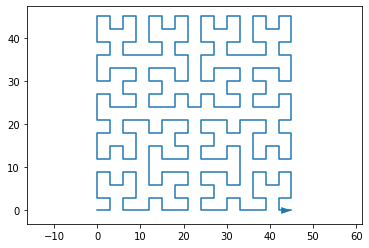

In [69]:
p.show()

# Tracage

In [12]:
p.connect(L_Gi=865, L_Di=870)

In [14]:
p.draw()

In [16]:
p.home()
p.disconnect()